
## Demonstrating the Difference between Close and Adjusted Close using Yahoo Finance API

In this notebook, we will use the Yahoo Finance API to fetch historical stock data and demonstrate the difference between the **Close** and **Adjusted Close** prices. The **Adjusted Close** price reflects adjustments for corporate actions such as dividends and stock splits, which are not accounted for in the **Close** price.

We will fetch data for a stock, identify the differences between **Close** and **Adjusted Close** prices, and explain the reasons for the adjustments.

The difference between "Close" and "Adjusted Close" in stock data primarily comes from adjustments made to reflect corporate actions like dividends, stock splits, or other adjustments that impact the price but aren't captured directly by the raw "Close" price.

1. Close Price:
The "Close" price is the price of the stock at the end of the trading day.
It represents the final price the stock was traded at during regular trading hours on a specific day.
This price is not adjusted for any dividends, stock splits, or other corporate actions.
2. Adjusted Close Price:
The "Adjusted Close" price is the closing price adjusted for corporate actions like:
Dividends: A company may pay out dividends to shareholders. When this happens, the stock price drops by roughly the dividend amount on the ex-dividend date, but the actual value of your investment hasn't decreased because you've received a dividend payment.
Stock Splits: If a company issues a stock split (e.g., 2-for-1), the stock price will be cut in half, but the number of shares you own will double. The adjusted close reflects this.
Rights offerings, spin-offs, and mergers can also impact the adjusted price.
The adjusted close allows investors to track the true return of holding a stock over time, as it includes dividend payouts and other corporate events. This is especially useful for long-term analysis, backtesting strategies, and calculating accurate historical returns.

# Example:
Let's say:

A stock's Close price on a given day is 100.
The company pays a dividend of 5 the next day.
The stock price may drop to 95 to account for the dividend payment, but the Adjusted Close would still reflect the
100, as the dividend has added to the total return.

# Summary:

Close: The raw price of the stock at the end of the trading day.
Adjusted Close: The closing price adjusted for corporate actions like dividends, splits, etc., providing a more accurate measure of a stock's performance over time.

## 1. Importing Libraries

First, we need to import the necessary libraries. We will use `yfinance` to fetch stock data and `pandas` for data manipulation.

In [ ]:

# Importing necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt



## 2. Fetching Historical Stock Data

We'll fetch historical stock data for a company known to have dividends and/or stock splits, such as **Apple Inc. (AAPL)**. This will give us a clear view of how the **Adjusted Close** and **Close** prices differ.


In [ ]:

# Fetch historical data for Apple Inc. (AAPL)
aapl_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

# Display the first few rows of the data
aapl_data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454504,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465666,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362821,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800



## 3. Exploring Close vs Adjusted Close Prices

Now that we have the data, we will look at specific instances where **Close** and **Adjusted Close** prices differ.


In [ ]:
pd.concat([aapl_data, aapl_data.shift(1)], axis=1)

In [ ]:

# Check if there are differences between Close and Adjusted Close prices
returns = aapl_data / aapl_data.shift(1) - 1
returns['Difference'] = returns['Close'] - returns['Adj Close']
# Display rows where there's a difference
corporate_events = returns[returns['Difference'].abs() > 0.000001]
returns[['Close', 'Adj Close', 'Difference']].loc[corporate_events.index]


,Close,Adj Close,Difference
Date,,,
2010-08-06,-0.006152,-0.006151,-0.000001
2012-08-09,0.001404,0.005703,-0.004299
2012-11-07,-0.042635,-0.038262,-0.004373
2013-02-07,0.023767,0.029734,-0.005967
2013-05-09,-0.015242,-0.008724,-0.006518
2013-08-08,-0.008538,-0.001991,-0.006547
2013-11-06,-0.008621,-0.002834,-0.005788
2014-02-06,-0.000156,0.005829,-0.005985
2014-05-08,-0.007327,-0.001782,-0.005545



## 4. Visualizing the Differences

Let's visualize how the **Close** and **Adjusted Close** prices differ over time.


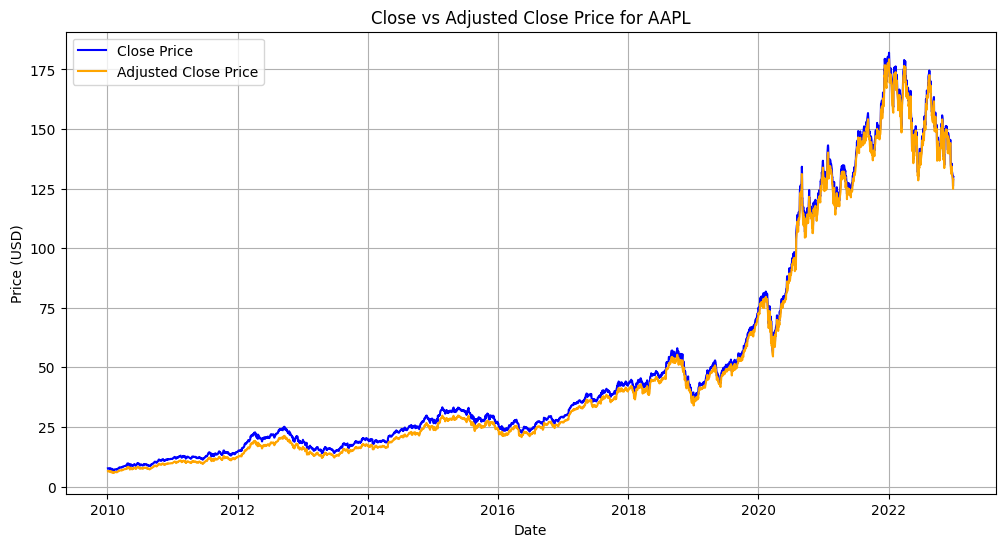

In [ ]:

# Plotting Close and Adjusted Close prices
plt.figure(figsize=(12, 6))
plt.plot(aapl_data['Close'], label='Close Price', color='blue')
plt.plot(aapl_data['Adj Close'], label='Adjusted Close Price', color='orange')
plt.title('Close vs Adjusted Close Price for AAPL')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Define the stock symbol
stock_symbol = "AAPL"

# Fetch stock data using yfinance
stock_data = yf.Ticker(stock_symbol)

# Retrieve dividend history
dividend_history = stock_data.dividends

# Display the dividend history
print(dividend_history.tail(50))


Date
1995-11-21 00:00:00-05:00    0.001071
2012-08-09 00:00:00-04:00    0.094643
2012-11-07 00:00:00-05:00    0.094643
2013-02-07 00:00:00-05:00    0.094643
2013-05-09 00:00:00-04:00    0.108929
2013-08-08 00:00:00-04:00    0.108929
2013-11-06 00:00:00-05:00    0.108929
2014-02-06 00:00:00-05:00    0.108929
2014-05-08 00:00:00-04:00    0.117500
2014-08-07 00:00:00-04:00    0.117500
2014-11-06 00:00:00-05:00    0.117500
2015-02-05 00:00:00-05:00    0.117500
2015-05-07 00:00:00-04:00    0.130000
2015-08-06 00:00:00-04:00    0.130000
2015-11-05 00:00:00-05:00    0.130000
2016-02-04 00:00:00-05:00    0.130000
2016-05-05 00:00:00-04:00    0.142500
2016-08-04 00:00:00-04:00    0.142500
2016-11-03 00:00:00-04:00    0.142500
2017-02-09 00:00:00-05:00    0.142500
2017-05-11 00:00:00-04:00    0.157500
2017-08-10 00:00:00-04:00    0.157500
2017-11-10 00:00:00-05:00    0.157500
2018-02-09 00:00:00-05:00    0.157500
2018-05-11 00:00:00-04:00    0.182500
2018-08-10 00:00:00-04:00    0.182500
2018-11

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

In [ ]:
aapl_data_on_dividend_dates = aapl_data.reindex(dividend_history.index)

In [ ]:
aapl_data_on_dividend_dates

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1987-05-11 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN
1987-08-10 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN
1987-11-17 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
1988-02-12 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
1988-05-16 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-08-11 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-10 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-09 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
aapl_data[['Close', 'Adj Close']].loc[corporate_events.index]


,Close,Adj Close
Date,,
2010-08-06,9.288929,7.844275
2012-08-09,22.168928,18.801493
2012-11-07,19.928572,16.978636
2013-02-07,16.722143,14.329873
2013-05-09,16.313213,14.071977
2013-08-08,16.464643,14.296386
2013-11-06,18.604286,16.248560
2014-02-06,18.303928,16.081928
2014-05-08,20.999643,18.553453
